## Q3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [ ]:
# https://drive.google.com/file/d/1-nZsKq7ulXdHQ5LgqOTWAoVvs_dnNyEO/view?usp=sharing
# https://drive.google.com/file/d/1TPl_naLzbBsGQsqq_LR4rQQ5RMPns0Gl/view?usp=sharing
!gdown 1-nZsKq7ulXdHQ5LgqOTWAoVvs_dnNyEO
!gdown 1TPl_naLzbBsGQsqq_LR4rQQ5RMPns0Gl

Downloading...
From: https://drive.google.com/uc?id=1-nZsKq7ulXdHQ5LgqOTWAoVvs_dnNyEO
To: /content/movies.csv
100% 494k/494k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TPl_naLzbBsGQsqq_LR4rQQ5RMPns0Gl
To: /content/ratings.csv
100% 2.48M/2.48M [00:00<00:00, 195MB/s]


In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
print('Movies: ', movies.shape)
print('Ratings: ', ratings.shape)

Movies:  (9742, 3)
Ratings:  (100836, 4)


In [ ]:
movies['List Index'] = movies.index

In [ ]:
movies

,movieId,title,genres,List Index
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738
9739,193585,Flint (2017),Drama,9739
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740


In [ ]:
df = movies.merge(ratings, how='inner', on='movieId')

In [ ]:
df

,movieId,title,genres,List Index,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,17,4.5,1305696483
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738,184,3.5,1537109545
100833,193585,Flint (2017),Drama,9739,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740,184,3.5,1537110021


In [ ]:
df = df.drop('timestamp', axis=1)
df = df.drop('title', axis=1)
df = df.drop('genres', axis=1)

In [ ]:
df

,movieId,List Index,userId,rating
0,1,0,1,4.0
1,1,0,5,4.0
2,1,0,7,4.5
3,1,0,15,2.5
4,1,0,17,4.5
...,...,...,...,...
100831,193581,9737,184,4.0
100832,193583,9738,184,3.5
100833,193585,9739,184,3.5
100834,193587,9740,184,3.5


In [ ]:
users = df.groupby('userId')

In [ ]:
users.ngroups

610

In [ ]:
train_X = []
for userId, userMovies in users:
  userMovies['rating'] = userMovies['rating']/5
  userMoviesList = [0]*movies.shape[0]
  for i,movie in userMovies.iterrows():
    userMoviesList[int(movie['List Index'])] = movie['rating']
  train_X.append(userMoviesList)

In [ ]:
print(train_X[0])

[0.8, 0, 0.8, 0, 0, 0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0.6, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0, 0.8, 0, 0, 0, 0, 

In [ ]:
np.array(train_X).shape

(610, 9742)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
visible_units = len(movies)
hidden_units = 20
W = tf.placeholder(tf.float32, [visible_units, hidden_units])
v_bias = tf.placeholder(tf.float32, [visible_units])
h_bias = tf.placeholder(tf.float32, [hidden_units])
x = tf.placeholder("float", [None, visible_units])
#forward pass
_h = tf.nn.sigmoid(tf.matmul(x, W) + h_bias)
h = tf.nn.relu(tf.sign(_h - tf.random_uniform(tf.shape(_h))))
#backward pass
_v = tf.nn.sigmoid(tf.matmul(h, tf.transpose(W)) + v_bias)
v = tf.nn.relu(tf.sign(_v - tf.random_uniform(tf.shape(_v))))
h1 = tf.nn.sigmoid(tf.matmul(v, W) + h_bias)

#cd
positive_gradient = tf.matmul(tf.transpose(x), h)
negative_gradient = tf.matmul(tf.transpose(v), h1)
CD = (positive_gradient - negative_gradient) / tf.to_float(tf.shape(x)[0])

#cost function
update_w = W + CD
update_vb = v_bias + tf.reduce_mean(x - v, 0)
update_hb = h_bias + tf.reduce_mean(h - h1, 0)
objective = tf.reduce_mean((x - v)*(x - v))

#Initialize all variables
cur_w = np.zeros([visible_units, hidden_units], np.float32)
cur_vb = np.zeros([visible_units], np.float32)
cur_hb = np.zeros([hidden_units], np.float32)
prv_w = np.zeros([visible_units, hidden_units], np.float32)
prv_vb = np.zeros([visible_units], np.float32)
prv_hb = np.zeros([hidden_units], np.float32)

#Initilize session and run it
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [ ]:
epochs = 20
batch_size = 128
costs = []
for i in tqdm(range(epochs)):
    for start, end in zip(range(0, len(train_X), batch_size), range(batch_size, len(train_X), batch_size)):
        batch = train_X[start:end]
        cur_w = sess.run(update_w, feed_dict={x: batch, W: prv_w, v_bias: prv_vb, h_bias: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={x: batch, W: prv_w, v_bias: prv_vb, h_bias: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={x: batch, W: prv_w, v_bias: prv_vb, h_bias: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    costs.append(sess.run(objective, feed_dict={x: train_X, W: cur_w, v_bias: cur_vb, h_bias: cur_hb}))

100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


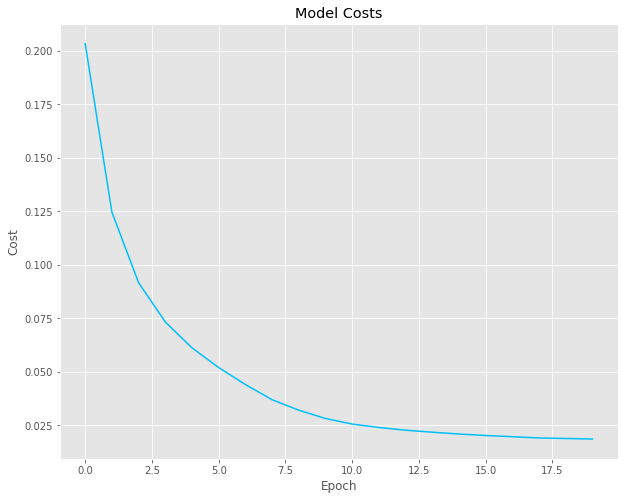

In [ ]:
fig , ax = plt.subplots(figsize = (10,8))
ax.plot(costs,color='#00bfff')
ax.set_xlabel('Epoch')
ax.set_title('Model Costs')
ax.set_ylabel('Cost')
plt.show()

In [ ]:
def find_top_rec(usr):

  hidden_out = tf.nn.sigmoid(tf.matmul(x, W) + h_bias)
  visible_out = tf.nn.sigmoid(tf.matmul(hidden_out, tf.transpose(W)) + v_bias)
  feed = sess.run(hidden_out, feed_dict={x: usr, W: prv_w, h_bias: prv_hb})
  rec = sess.run(visible_out, feed_dict={hidden_out: feed, W: prv_w, v_bias: prv_vb})
  return rec

In [ ]:
usr = train_X[75]
rec_movies = find_top_rec([usr])
rec_movies

array([[0.21169454, 0.09618857, 0.03903125, ..., 0.00387926, 0.00333613,
        0.00385023]], dtype=float32)

In [ ]:
all_movies_for_user = movies.copy()
all_movies_for_user["rec"] = rec_movies[0]
all_movies_for_user = all_movies_for_user.sort_values(['rec'], ascending=False)

In [ ]:
all_movies_for_user.head(15)

,movieId,title,genres,List Index,rec
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,2226,0.521025
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224,0.484522
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1939,0.479027
2078,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,2078,0.474231
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,257,0.458953
2145,2858,American Beauty (1999),Drama|Romance,2145,0.438831
3141,4226,Memento (2000),Mystery|Thriller,3141,0.431368
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,277,0.424541
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,510,0.422451
3638,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,3638,0.418379
